# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.091361e+01     7.008299e+00
 * time: 0.003245830535888672
     1     2.891157e+01     4.322114e+00
 * time: 0.014474868774414062
     2     2.085472e+01     4.289653e+00
 * time: 0.028180837631225586
     3     1.460098e+01     3.350462e+00
 * time: 0.041825056076049805
     4     1.140989e+01     1.507698e+00
 * time: 0.05548882484436035
     5     1.072457e+01     2.332760e+00
 * time: 0.06638288497924805
     6     1.006774e+01     1.347645e+00
 * time: 0.07736086845397949
     7     9.299695e+00     1.308187e+00
 * time: 0.0885009765625
     8     8.693413e+00     1.246456e+00
 * time: 0.09992098808288574
     9     8.342533e+00     1.082993e+00
 * time: 0.11133694648742676
    10     8.173255e+00     9.126516e-01
 * time: 0.12256002426147461
    11     8.065872e+00     7.927639e-01
 * time: 0.13400888442993164
    12     7.960061e+00     6.379363e-01
 * time: 0.14537501335144043
    13     7.952370e+00     1.059798e+00
 * time:

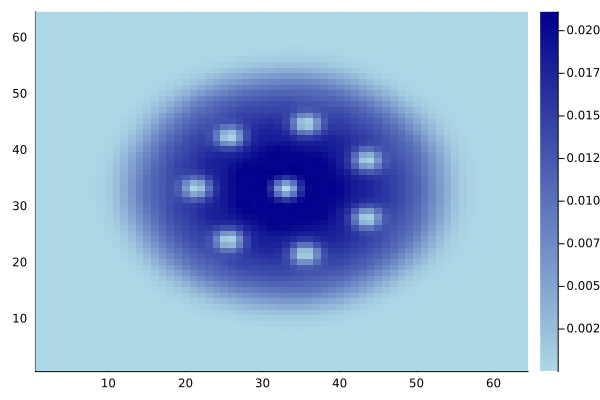

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)